In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
file = '../../../../../../dataframes/enigh/HOGARES/df_transform_cat_to_num.csv'

In [3]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

num_trab_d,acc_alim1,acc_alim2,acc_alim3,acc_alim4,acc_alim5,acc_alim6,alim17_1,alim17_2,alim17_3,⋯,regalos,remunera,transferen,parto_g,embarazo_g,negcua,est_alim,est_trans,bene_licon,diconsa
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.2867859,0.5983843,⋯,0.5366417,0.8557415,0.6964801,0.9976919,0.9884593,0.9607617,0.06000000,0.141129032,0.8880554,1.0000000
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.8718984,0.5983843,⋯,0.5366417,0.8557415,1.0000000,0.9976919,0.9884593,0.9607617,0.02571429,0.004032258,0.8880554,1.0000000
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.9469129,0.5522216,0.4483555,⋯,0.5366417,0.8557415,0.6964801,0.9976919,0.9884593,0.9607617,0.04857143,0.070564516,0.8880554,1.0000000
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8840162,0.2867859,0.9001731,⋯,1.0000000,1.0000000,0.6964801,0.9976919,0.9884593,0.9607617,0.03428571,0.060483871,0.8880554,0.8003462
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.9428736,0.4483555,⋯,0.5366417,0.8557415,1.0000000,0.9976919,0.9884593,0.9607617,0.08857143,0.060483871,0.8880554,0.5856896
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.2867859,0.4483555,⋯,1.0000000,0.8557415,0.6964801,0.9976919,0.9884593,1.0000000,0.09428571,0.483870968,0.8880554,1.0000000


In [4]:
ncol(data)

[1] 75

In [5]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

Warning message:
“did not converge in 10 iterations”

In [6]:
max(dunn_kmeans)

[1] 0.2812625

Saving 7 x 7 in image


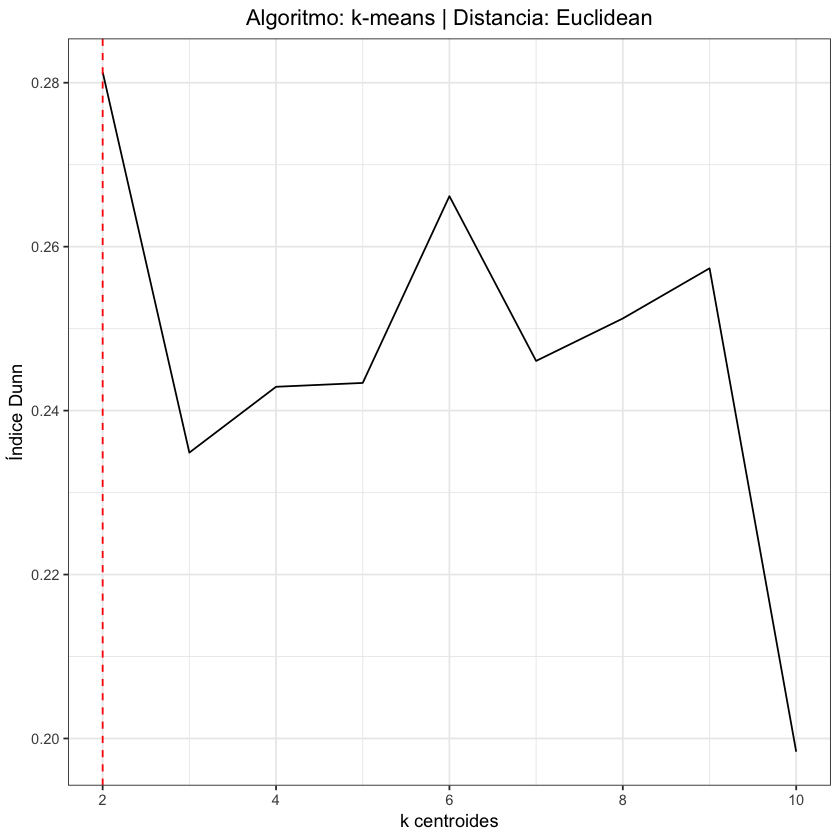

In [7]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-means | Distancia: Euclidean', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/HOGARES/dunn_euclidean_transform.png", dpi = 300)
    

In [8]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

Saving 7 x 7 in image


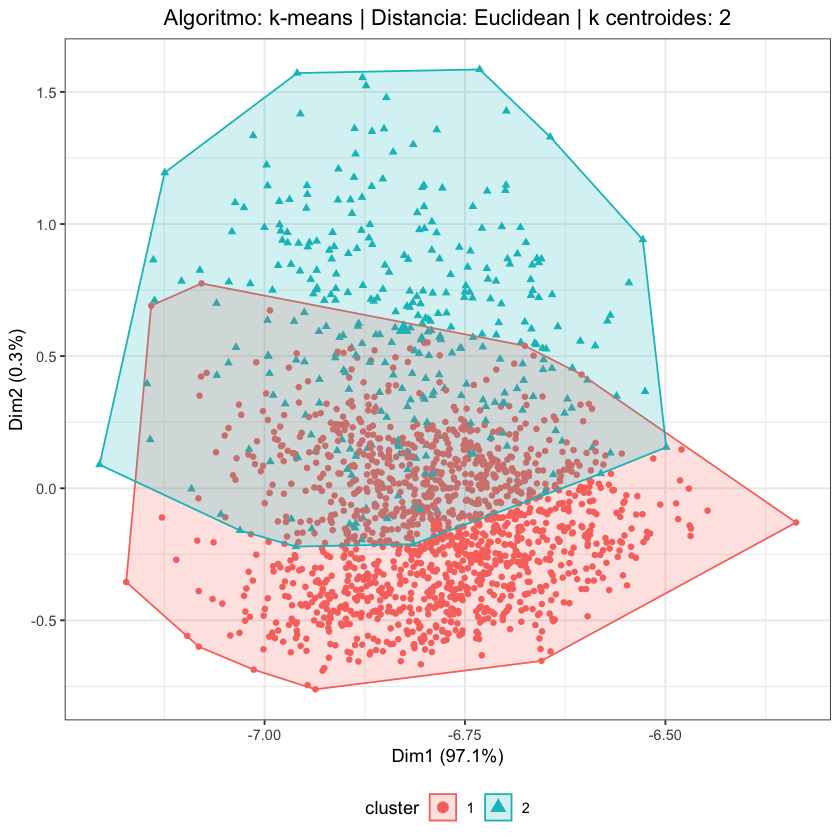

In [9]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-means | Distancia: Euclidean | k centroides:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/HOGARES/kmeans_euclidean_transform.png", 
       dpi = 300)

In [10]:
file = '../../../../../../dataframes/enigh/HOGARES/df_transform_cluster.csv'


In [11]:
write.csv(kmeans$cluster, 
          file = file,
          row.names=F)
